# Import

## Import library

In [1]:
import os
import sys
import warnings
from tqdm import tqdm_notebook as tqdm 

import numpy as np
import pandas as pd

# 데이터 전처리
import re
from konlpy.tag import Okt
from konlpy.tag import Mecab
import rhinoMorph

# 데이터 분석
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim import corpora
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

# 데이터 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
# import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.sklearn

warnings.filterwarnings(action='ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# 현재 jupyter 위치를 PROJECT_DIR 추가
PROJECT_DIR = os.path.abspath(os.path.join(os.path.realpath('__file__'), '..'))
sys.path.insert(0, PROJECT_DIR)
DATA_DIR = PROJECT_DIR + '/data' # 데이터 위치 
print(DATA_DIR)

C:\Users\lime1\Documents\study\Python\project/data


## import

In [3]:
data_df = pd.read_excel(DATA_DIR +'/news_df_210205_v03_dna.xlsx')
data_df.head(2)

media        date                             title  \
0  조선일보  2020-01-02       150만명 몰린  타임스스퀘어 새해 무대도 BTS   
1  조선일보  2020-01-02  방탄소년단 CNN 선정 2010년대 음악 변화시킨 아티스트   

                                    article_original  \
0  2012년 싸이에 이어 두 번째… ABC방송 라이브 쇼에서 생중계\n \n\n\n\...   
1  방탄소년단 BTS 이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트...   

                                                 url  
0  https://news.naver.com/main/read.nhn?mode=LSD&...  
1  https://news.naver.com/main/read.nhn?mode=LSD&...

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   media             863 non-null    object
 1   date              863 non-null    object
 2   title             863 non-null    object
 3   article_original  863 non-null    object
 4   url               863 non-null    object
dtypes: object(5)
memory usage: 33.8+ KB


# 데이터 전처리

In [5]:
data_df['article_original'].iloc[0]

'2012년 싸이에 이어 두 번째… ABC방송 라이브 쇼에서 생중계\n \n\n\n\n 전 지구를 홀린 그룹입니다 \n \n\n 사회자의 소개와 함께 방탄소년단 BTS 이 모습을 드러냈다. 2019년의 마지막 날 미국 뉴욕 맨해튼 타임스스퀘어 무대에 선 것이다. 12월 31일 현지 시각 저녁 열리는 타임스스퀘어 볼드롭 대형 크리스털 볼이 신년 카운트다운과 함께 떨어지는 행사 을 보기 위해 몰려든 사람들로 이곳은 오전부터 부산스러웠다. 매년 이날만 되면 최소 100만명이 찾는 곳이지만 올해는 BTS 때문에 열기가 더욱 뜨거웠다. 뉴욕경찰 NYPD 은 이날 몰린 인파가 150만명이라고 추정했다.\n \n\n 한국 가수로 타임스스퀘어 새해맞이 무대에 오른 건 2012년 싸이에 이어 두 번째다. BTS는 밤 10시 38분부터 8분간 열정적인 춤과 노래로 시선을 사로잡았다. 8년 전 100만 인파가 싸이의 강남스타일 에 맞춰 말춤 을 췄던 것처럼 이날 타임스스퀘어에 모인 전 세계 아미 BTS 팬 들은 BTS가 작은 것들을 위한 시 와 Make It Right 를 부를 때 야광봉을 흔들며 한국어로 떼창을 선사했다. 공연을 마친 뒤 리더 RM은 여섯 살 때부터 나 홀로 집에 같은 영화에서 보던 광경이 눈앞에 있다 며 감격했다. 멤버들은 한목소리로 해피 뉴 이어 를 외쳤다.\n \n\n BTS 공연은 미국 최대 새해맞이 라이브 쇼인 ABC방송의 뉴 이어스 로킹 이브 New Year s Rocking Eve 를 통해서도 생중계됐다. 최정상급 가수들만 출연하는 유명 프로그램이다. 올해는 BTS 외에 컨트리 가수 샘 헌트와 싱어송 라이터 앨러니스 모리세트가 무대에 섰다. BTS는 2017년 사전 녹화를 통해 할리우드 무대에 출연했지만 타임스스퀘어 무대에 직접 선 것은 이번이 처음이다. 행사를 공동 진행한 라이언 시크레스트는 올해 타임스스퀘어의 절반은 BTS 팬으로 채워질 것 이라고 언급했다.\n \n\n BTS의 인기를 입증하듯 이날 오후부터 타임스스퀘어 주변 곳곳에선 BTS 노

기사 원문 데이터는 str 타입으로 개행문자(\n)를 포함하고 있습니다.  
이에 영문, 한글, 숫자를 제외한 불필요한 문자(\n ..)를 제거합니다.

In [6]:
# clearning
data_df['article_original'] = data_df['article_original'].apply(lambda x : re.sub(r'[^A-Za-z0-9가-힣 ]','',x))

In [7]:
data_df['article_original'][0]

'2012년 싸이에 이어 두 번째 ABC방송 라이브 쇼에서 생중계  전 지구를 홀린 그룹입니다   사회자의 소개와 함께 방탄소년단 BTS 이 모습을 드러냈다 2019년의 마지막 날 미국 뉴욕 맨해튼 타임스스퀘어 무대에 선 것이다 12월 31일 현지 시각 저녁 열리는 타임스스퀘어 볼드롭 대형 크리스털 볼이 신년 카운트다운과 함께 떨어지는 행사 을 보기 위해 몰려든 사람들로 이곳은 오전부터 부산스러웠다 매년 이날만 되면 최소 100만명이 찾는 곳이지만 올해는 BTS 때문에 열기가 더욱 뜨거웠다 뉴욕경찰 NYPD 은 이날 몰린 인파가 150만명이라고 추정했다  한국 가수로 타임스스퀘어 새해맞이 무대에 오른 건 2012년 싸이에 이어 두 번째다 BTS는 밤 10시 38분부터 8분간 열정적인 춤과 노래로 시선을 사로잡았다 8년 전 100만 인파가 싸이의 강남스타일 에 맞춰 말춤 을 췄던 것처럼 이날 타임스스퀘어에 모인 전 세계 아미 BTS 팬 들은 BTS가 작은 것들을 위한 시 와 Make It Right 를 부를 때 야광봉을 흔들며 한국어로 떼창을 선사했다 공연을 마친 뒤 리더 RM은 여섯 살 때부터 나 홀로 집에 같은 영화에서 보던 광경이 눈앞에 있다 며 감격했다 멤버들은 한목소리로 해피 뉴 이어 를 외쳤다  BTS 공연은 미국 최대 새해맞이 라이브 쇼인 ABC방송의 뉴 이어스 로킹 이브 New Year s Rocking Eve 를 통해서도 생중계됐다 최정상급 가수들만 출연하는 유명 프로그램이다 올해는 BTS 외에 컨트리 가수 샘 헌트와 싱어송 라이터 앨러니스 모리세트가 무대에 섰다 BTS는 2017년 사전 녹화를 통해 할리우드 무대에 출연했지만 타임스스퀘어 무대에 직접 선 것은 이번이 처음이다 행사를 공동 진행한 라이언 시크레스트는 올해 타임스스퀘어의 절반은 BTS 팬으로 채워질 것 이라고 언급했다  BTS의 인기를 입증하듯 이날 오후부터 타임스스퀘어 주변 곳곳에선 BTS 노래가 흘러나왔고 행인들이 노래에 맞춰 몸을 흔들었다 새벽 1시부터 줄 서 기다렸다는 에블린

아래 토큰화 시 불용어를 삭제하기 위해 stop word를 파일을 불러옵니다.   
stop word 출처: https://www.ranks.nl/stopwords/korean  

In [8]:
stopwords = open(DATA_DIR+'/stopwords_kor.txt','r', encoding='utf-8').read().split('\n')
stopwords[:10]

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']

# 단어 토큰화

rhinoMorph 패키지를 사용하며, 불용어와 1글자 이하는 제거합니다.  
※ 주의: konlpy 패키지와 rhinoMorph 패키지를 함께 실행하면 에러 발생함

In [9]:
# 실질형태소, 어말어미(emoi) 제외, NNG+NNP, XR+하: 동사로 변형(xrVv) 안함
# 품사정보: https://m.blog.naver.com/lingua/220143966152
# NNG: 일반명사 / NNP: 고유명사 / (VV: 동사) / VA: 형용사 
# (XR: 어근 / IC: 감탄사 / MM: 관형사 / MAG: 일반부사 / MAJ: 접속부사)
rhino = rhinoMorph.startRhino()
data_df['token_rhino'] = data_df.article_original.apply(lambda x: rhinoMorph.onlyMorph_list(rhino, x, pos=['NNG','NNP','VA'], combineN=True)) # eomi=True, xrVv=True))
data_df.token_rhino = data_df.token_rhino.apply(lambda x : [w for w in x if x not in stopwords if len(w) >1])  # 불용어 제거
data_df.head(2)

filepath:  C:\Users\lime1\anaconda3\Lib\site-packages
classpath:  C:\Users\lime1\anaconda3\Lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


media        date                             title  \
0  조선일보  2020-01-02       150만명 몰린  타임스스퀘어 새해 무대도 BTS   
1  조선일보  2020-01-02  방탄소년단 CNN 선정 2010년대 음악 변화시킨 아티스트   

                                    article_original  \
0  2012년 싸이에 이어 두 번째 ABC방송 라이브 쇼에서 생중계  전 지구를 홀린 ...   
1  방탄소년단 BTS 이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트...   

                                                 url  \
0  https://news.naver.com/main/read.nhn?mode=LSD&...   
1  https://news.naver.com/main/read.nhn?mode=LSD&...   

                                         token_rhino  
0  [방송, 라이브, 생중계, 지구, 그룹, 사회자, 소개, 방탄소년단, 모습, 마지막...  
1  [방탄소년단, 미국, 선정, 음악, 변화, 아티스트, 현지시각, 자신, 음악, 장르...

In [10]:
idx = 0
print('\n === ', idx, ' ===\n')
print('\n-- article_original --\n', data_df['article_original'].iloc[idx])
print('\n-- rhinoMorph --\n', data_df['token_rhino'].iloc[idx])


 ===  0  ===


-- article_original --
 2012년 싸이에 이어 두 번째 ABC방송 라이브 쇼에서 생중계  전 지구를 홀린 그룹입니다   사회자의 소개와 함께 방탄소년단 BTS 이 모습을 드러냈다 2019년의 마지막 날 미국 뉴욕 맨해튼 타임스스퀘어 무대에 선 것이다 12월 31일 현지 시각 저녁 열리는 타임스스퀘어 볼드롭 대형 크리스털 볼이 신년 카운트다운과 함께 떨어지는 행사 을 보기 위해 몰려든 사람들로 이곳은 오전부터 부산스러웠다 매년 이날만 되면 최소 100만명이 찾는 곳이지만 올해는 BTS 때문에 열기가 더욱 뜨거웠다 뉴욕경찰 NYPD 은 이날 몰린 인파가 150만명이라고 추정했다  한국 가수로 타임스스퀘어 새해맞이 무대에 오른 건 2012년 싸이에 이어 두 번째다 BTS는 밤 10시 38분부터 8분간 열정적인 춤과 노래로 시선을 사로잡았다 8년 전 100만 인파가 싸이의 강남스타일 에 맞춰 말춤 을 췄던 것처럼 이날 타임스스퀘어에 모인 전 세계 아미 BTS 팬 들은 BTS가 작은 것들을 위한 시 와 Make It Right 를 부를 때 야광봉을 흔들며 한국어로 떼창을 선사했다 공연을 마친 뒤 리더 RM은 여섯 살 때부터 나 홀로 집에 같은 영화에서 보던 광경이 눈앞에 있다 며 감격했다 멤버들은 한목소리로 해피 뉴 이어 를 외쳤다  BTS 공연은 미국 최대 새해맞이 라이브 쇼인 ABC방송의 뉴 이어스 로킹 이브 New Year s Rocking Eve 를 통해서도 생중계됐다 최정상급 가수들만 출연하는 유명 프로그램이다 올해는 BTS 외에 컨트리 가수 샘 헌트와 싱어송 라이터 앨러니스 모리세트가 무대에 섰다 BTS는 2017년 사전 녹화를 통해 할리우드 무대에 출연했지만 타임스스퀘어 무대에 직접 선 것은 이번이 처음이다 행사를 공동 진행한 라이언 시크레스트는 올해 타임스스퀘어의 절반은 BTS 팬으로 채워질 것 이라고 언급했다  BTS의 인기를 입증하듯 이날 오후부터 타임스스퀘어 주변 곳곳에선 BTS 노래가 흘러나왔고 행인

# 단어 분포 확인

In [11]:
# rhino
words_list = [word for sent in data_df['token_rhino'] for word in sent]
print(words_list[:20])
vocab = Counter(words_list)
# vocab.most_common(50)

['방송', '라이브', '생중계', '지구', '그룹', '사회자', '소개', '방탄소년단', '모습', '마지막', '미국', '뉴욕', '맨해튼', '타임스스퀘어', '무대', '현지', '시각', '저녁', '타임스스퀘어', '드롭']


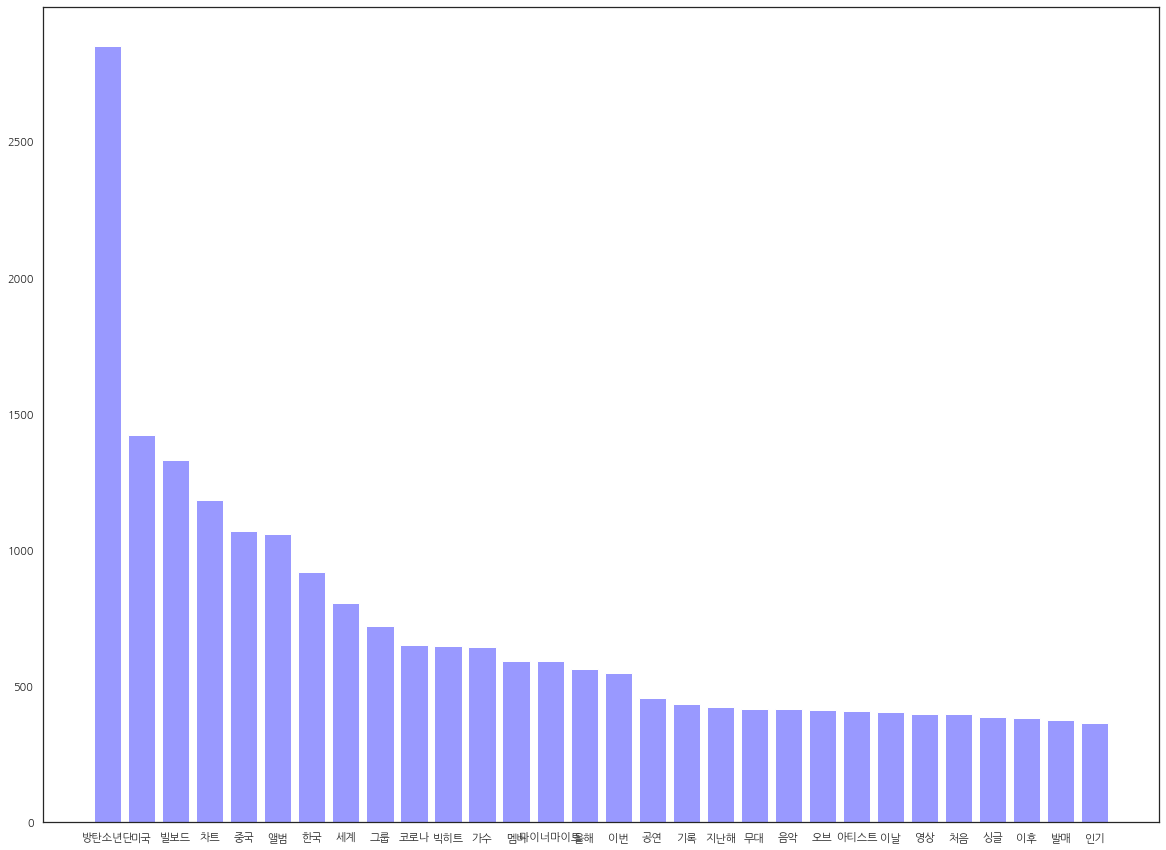

In [12]:
# rhinoMorph ----
vocab_most50_df = pd.DataFrame(vocab.most_common(100), columns=['vocab','count'])
num = 30
sorted_keys = vocab_most50_df['vocab'][:num]
sorted_values = vocab_most50_df['count'][:num]

plt.figure(figsize=(20,15))
plt.rc('font', family='NanumGothic') 
plt.bar(range(num), sorted_values, color='#9999ff')
plt.xticks(range(num), sorted_keys)
plt.show()

# 문서유사도

문서유사도를 확인하기 위해 article original과 rhinoMorph를 활용해 토큰화한 단어를 CountVectorizer와 TfidifVectorizer를 활용하여 BoW를 만들고자 한다.  
이후 이를 통해 Cosine similarity를 확인하고자 한다.  

In [13]:
# CountVectorizer : sklearn 제공
# - max_df: 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어를 제외하기 위함 
# - min_df: 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어를 제외하기 위함
# - max_features : 추출하는 feature의 개수 제한. 정수 지정
cnt_vect = CountVectorizer(max_df=2000, lowercase=False, min_df=10, stop_words=stopwords)

CounterVectorizer Shape(Original): (863, 3062)
(863, 863)
[[1.         0.26168486 0.2057513  ... 0.22313314 0.07344211 0.10366989]
 [0.26168486 1.         0.16987895 ... 0.16996732 0.07745967 0.05918745]
 [0.2057513  0.16987895 1.         ... 0.12896518 0.03537303 0.17668278]
 ...
 [0.22313314 0.16996732 0.12896518 ... 1.         0.08777075 0.14295692]
 [0.07344211 0.07745967 0.03537303 ... 0.08777075 1.         0.07641066]
 [0.10366989 0.05918745 0.17668278 ... 0.14295692 0.07641066 1.        ]]


<AxesSubplot:>

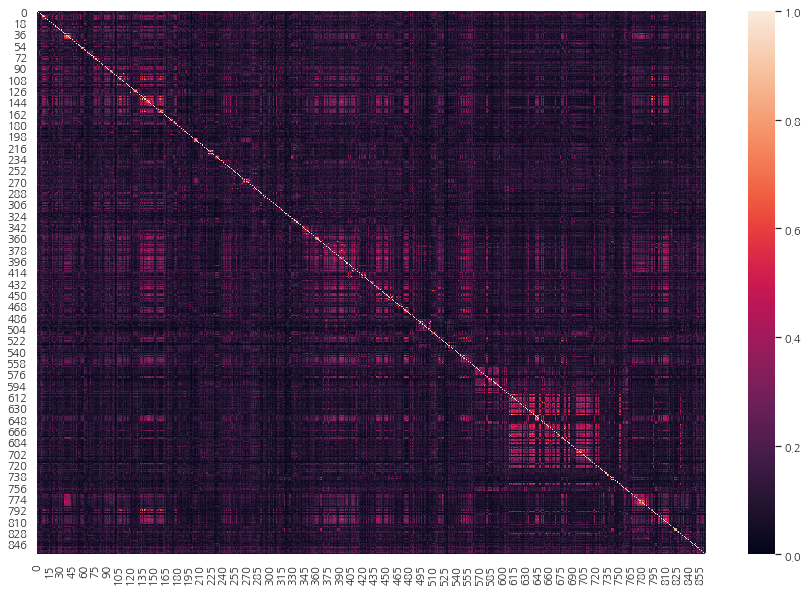

In [15]:
# fit CountVectorizer - article_original
bow_cnt = cnt_vect.fit_transform(data_df.article_original)
print('CounterVectorizer Shape(Original):', bow_cnt.shape)

# cosine similarity - article_origin(CountVectorizer)
cos_sim = cosine_similarity(bow_cnt,bow_cnt)
print(cos_sim.shape)
print(cos_sim)
plt.figure(figsize=(15,10))
sns.heatmap(cos_sim)

CounterVectorizer Shape(rhinoMorph): (863, 1604)
(863, 863)
[[1.         0.25651795 0.26173967 ... 0.29648616 0.03928371 0.17916337]
 [0.25651795 1.         0.35300056 ... 0.22111019 0.02133948 0.18054333]
 [0.26173967 0.35300056 1.         ... 0.1665431  0.05743797 0.28516151]
 ...
 [0.29648616 0.22111019 0.1665431  ... 1.         0.10304701 0.21983706]
 [0.03928371 0.02133948 0.05743797 ... 0.10304701 1.         0.10281895]
 [0.17916337 0.18054333 0.28516151 ... 0.21983706 0.10281895 1.        ]]


<AxesSubplot:>

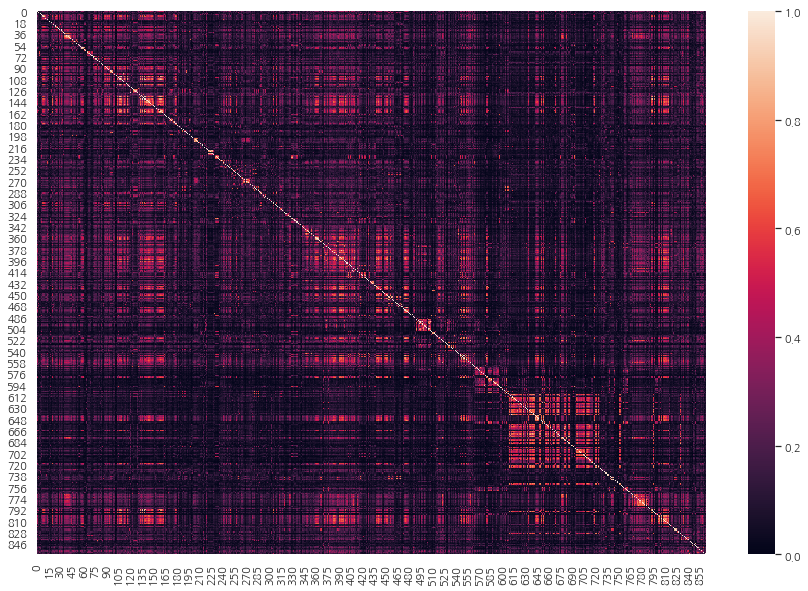

In [18]:
# fit CountVectorizer - rhinoMorph
bow_cnt = cnt_vect.fit_transform(data_df.token_rhino.apply(lambda x : ' '.join(x)))
print('CounterVectorizer Shape(rhinoMorph):', bow_cnt.shape)

# cosine similarity - rhinoMorph(CountVectorizer)
cos_sim = cosine_similarity(bow_cnt,bow_cnt)
print(cos_sim.shape)
print(cos_sim)
plt.figure(figsize=(15,10))
sns.heatmap(cos_sim)

In [22]:
# TfidfVectorizer
# - tokenizer = LemNormalize 표준화, 사전(dic)에 기반한 표준화 
tfidf_vect = TfidfVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=10, max_df=2000)

TfidfVectorizer Shape(Original): (863, 3848)
(863, 863)
[[1.         0.15410544 0.12776644 ... 0.13945185 0.01111704 0.04472781]
 [0.15410544 1.         0.05372645 ... 0.07898542 0.03341726 0.01649761]
 [0.12776644 0.05372645 1.         ... 0.06894567 0.00914533 0.1084977 ]
 ...
 [0.13945185 0.07898542 0.06894567 ... 1.         0.06875761 0.07295119]
 [0.01111704 0.03341726 0.00914533 ... 0.06875761 1.         0.03673012]
 [0.04472781 0.01649761 0.1084977  ... 0.07295119 0.03673012 1.        ]]


<AxesSubplot:>

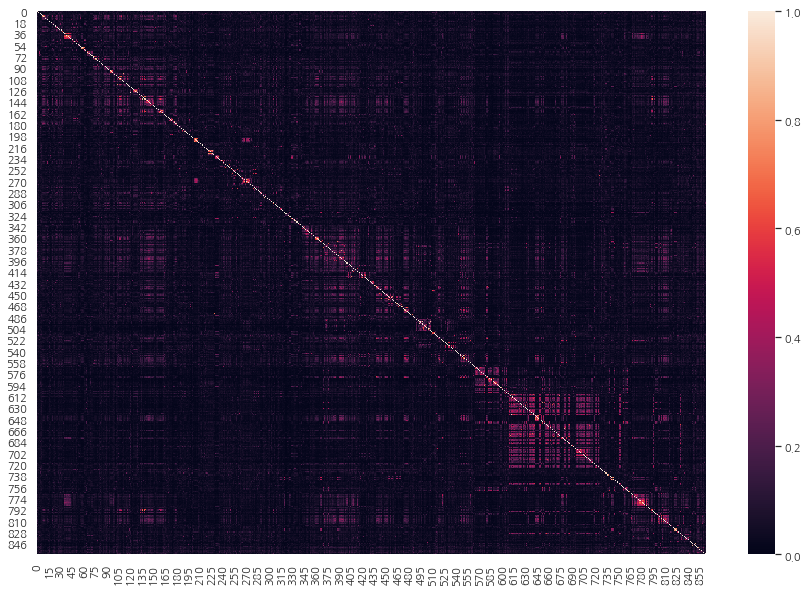

In [25]:
# fit TfidfVectorizer - article_original
bow_tfidf = tfidf_vect.fit_transform(data_df.article_original)
print('TfidfVectorizer Shape(Original):', bow_tfidf.shape)

# cosine similarity - article_origin (TfidfVectorizer)
cos_sim = cosine_similarity(bow_tfidf,bow_tfidf)
print(cos_sim.shape)
print(cos_sim)
plt.figure(figsize=(15,10))
sns.heatmap(cos_sim)

TfidfVectorizer Shape(Original): (863, 3848)
(863, 863)
[[1.         0.15410544 0.12776644 ... 0.13945185 0.01111704 0.04472781]
 [0.15410544 1.         0.05372645 ... 0.07898542 0.03341726 0.01649761]
 [0.12776644 0.05372645 1.         ... 0.06894567 0.00914533 0.1084977 ]
 ...
 [0.13945185 0.07898542 0.06894567 ... 1.         0.06875761 0.07295119]
 [0.01111704 0.03341726 0.00914533 ... 0.06875761 1.         0.03673012]
 [0.04472781 0.01649761 0.1084977  ... 0.07295119 0.03673012 1.        ]]


<AxesSubplot:>

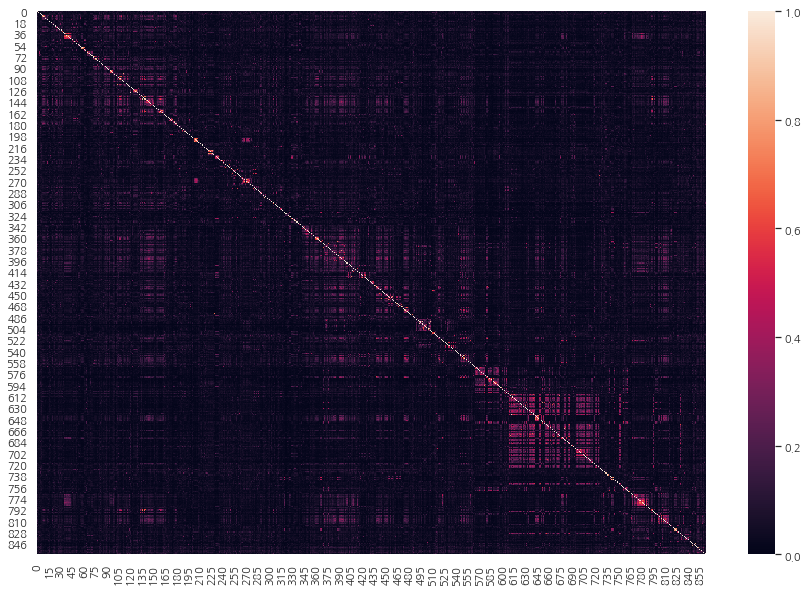

In [26]:
# fit TfidfVectorizer - rhinoMorph
bow_tidif = tfidf_vect.fit_transform(data_df.token_rhino.apply(lambda x : ' '.join(x)))
print('TfidfVectorizer Shape(Original):', bow_tfidf.shape)

# cosine similarity - rhinoMorph (TfidfVectorizer)
cos_sim = cosine_similarity(bow_tfidf,bow_tfidf)
print(cos_sim.shape)
print(cos_sim)
plt.figure(figsize=(15,10))
sns.heatmap(cos_sim)

article_original 문서보다는 rhinoMorph로 토큰화된 것이 문서유사도를 보다 분명하게 나타낸다.  
그리고 CountVectorizer가 TfidfVecotrizer보다 문서유사도로 관계성 높은 그룹을 잘 나타내는 것으로 보인다.

# 토픽 모델링(LDA)으로 그룹화
- Latent Dirichlet Allocation
- 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합할 확률로 추정하여 토픽 추출
- 문서들이 토픽들의 혼합으로 구성되어져 있으며, 토픽들은 확률분포에 기반하여 단어를 생성한다고 가정함.

<br></br>

- 사용자 알고리즘 지정사항: 토픽 개수
- 모든 문서의 모든 단어에 대하여 아래 사항 반복 진행
    - 어떤 문서의 각 단어 w는 자신은 잘못된 토픽에 할당되어져 있지만, 다른 단어들은 전부 올바른 토픽에 할당되어져 있는 상태라고 가정.
    - 이에 따라 단어 w는 아래 두가지 기준에 따라 토픽 재할당
        - 문서 d의 단어들 중 토픽 t에 해당하는 단어 비율
        - 단어 w를 갖고 있는 모든 문서들 중 토픽 t가 할당된 비율

## 1. gensim LDA
- dictionary : (전체 단어 정수 인덱스, 단어)
- corpus : 문서 별 단어 정수 인코딩 
    - (단어의 정수 인코딩 값,해당 뉴스에서의 해당 단어의 빈도수)

In [27]:
def gensimLDA(data, num_topics):
    # dictionary : 문서 전체 단어에 대한 정수인코딩
    # corpus : (단어의 정수 인코딩 값,해당 뉴스에서의 해당 단어의 빈도수)
    dictionary = corpora.Dictionary(data)
    print('dictionary len:',len(dictionary), ', type:', type(dictionary),'\n',dictionary)
    corpus = [dictionary.doc2bow(text) for text in data]
    print('corpus type:', type(corpus), ', corpus[0] type:', type(corpus[0]))
    
    ldamodel = gensim.models.ldamodel.LdaModel( corpus, num_topics = num_topics, id2word=dictionary, passes=15)
    topics = ldamodel.print_topics(num_words=4)
    print('-- topic --')
    for topic in topics:
        print(topic)
        
    return ldamodel, corpus, dictionary

In [28]:
# 토픽 수: 5
ldamodel, corpus, dictionary = gensimLDA(data_df['token_rhino'],5)

dictionary len: 14217 , type: <class 'gensim.corpora.dictionary.Dictionary'> 
 Dictionary(14217 unique tokens: ['NEW', '가수', '강남스타일', '거대', '곳곳']...)
corpus type: <class 'list'> , corpus[0] type: <class 'list'>
-- topic --
(0, '0.020*"빅히트" + 0.017*"방탄소년단" + 0.011*"공연" + 0.007*"콘서트"')
(1, '0.010*"병역" + 0.007*"의원" + 0.006*"방탄소년단" + 0.006*"병역특례"')
(2, '0.028*"방탄소년단" + 0.021*"중국" + 0.019*"미국" + 0.018*"빌보드"')
(3, '0.013*"방탄소년단" + 0.012*"코로나" + 0.011*"청년" + 0.007*"대통령"')
(4, '0.030*"앨범" + 0.023*"방탄소년단" + 0.017*"차트" + 0.015*"빌보드"')


In [29]:
# LDA 시각화하기
# - 각 원과의 거리는 각 토픽들이 서로 얼마나 다른지를 보여줍니다. 
# - 만약 두 개의 원이 겹친다면, 이 두 개의 토픽은 유사한 토픽이라는 의미입니다. 

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [30]:
# 토픽 수: 6
ldamodel, corpus, dictionary = gensimLDA(data_df['token_rhino'],6)

dictionary len: 14217 , type: <class 'gensim.corpora.dictionary.Dictionary'> 
 Dictionary(14217 unique tokens: ['NEW', '가수', '강남스타일', '거대', '곳곳']...)
corpus type: <class 'list'> , corpus[0] type: <class 'list'>
-- topic --
(0, '0.020*"빅히트" + 0.017*"방탄소년단" + 0.009*"멤버" + 0.008*"상장"')
(1, '0.022*"방탄소년단" + 0.012*"앨범" + 0.007*"뮤직비디오" + 0.007*"미국"')
(2, '0.038*"중국" + 0.011*"한국" + 0.009*"미국" + 0.009*"방탄소년단"')
(3, '0.018*"청년" + 0.010*"방탄소년단" + 0.007*"빅히트" + 0.006*"이태원"')
(4, '0.017*"공연" + 0.015*"방탄소년단" + 0.012*"코로나" + 0.010*"콘서트"')
(5, '0.031*"방탄소년단" + 0.029*"빌보드" + 0.026*"차트" + 0.019*"미국"')


In [31]:
# LDA 시각화하기
# - 각 원과의 거리는 각 토픽들이 서로 얼마나 다른지를 보여줍니다. 
# - 만약 두 개의 원이 겹친다면, 이 두 개의 토픽은 유사한 토픽이라는 의미입니다. 

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [32]:
# 토픽 수: 7
ldamodel, corpus, dictionary = gensimLDA(data_df['token_rhino'],7)

dictionary len: 14217 , type: <class 'gensim.corpora.dictionary.Dictionary'> 
 Dictionary(14217 unique tokens: ['NEW', '가수', '강남스타일', '거대', '곳곳']...)
corpus type: <class 'list'> , corpus[0] type: <class 'list'>
-- topic --
(0, '0.024*"방탄소년단" + 0.011*"공연" + 0.011*"앨범" + 0.010*"세계"')
(1, '0.007*"중고" + 0.006*"방탄소년단" + 0.005*"영상" + 0.005*"광고"')
(2, '0.012*"병역" + 0.010*"방탄소년단" + 0.007*"문제" + 0.006*"연기"')
(3, '0.050*"중국" + 0.014*"한국" + 0.013*"미국" + 0.010*"네티즌"')
(4, '0.035*"방탄소년단" + 0.029*"빌보드" + 0.026*"차트" + 0.020*"미국"')
(5, '0.012*"방탄소년단" + 0.011*"청년" + 0.010*"대통령" + 0.007*"패션"')
(6, '0.035*"빅히트" + 0.011*"상장" + 0.008*"공모" + 0.007*"대표"')


In [33]:
# LDA 시각화하기
# - 각 원과의 거리는 각 토픽들이 서로 얼마나 다른지를 보여줍니다. 
# - 만약 두 개의 원이 겹친다면, 이 두 개의 토픽은 유사한 토픽이라는 의미입니다. 

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [34]:
# 토픽 수: 8
ldamodel, corpus, dictionary = gensimLDA(data_df['token_rhino'],8)

dictionary len: 14217 , type: <class 'gensim.corpora.dictionary.Dictionary'> 
 Dictionary(14217 unique tokens: ['NEW', '가수', '강남스타일', '거대', '곳곳']...)
corpus type: <class 'list'> , corpus[0] type: <class 'list'>
-- topic --
(0, '0.052*"중국" + 0.016*"한국" + 0.012*"미국" + 0.010*"네티즌"')
(1, '0.032*"빅히트" + 0.010*"상장" + 0.008*"공모" + 0.007*"방탄소년단"')
(2, '0.036*"방탄소년단" + 0.017*"후보" + 0.014*"미국" + 0.013*"시상식"')
(3, '0.033*"빌보드" + 0.030*"차트" + 0.029*"방탄소년단" + 0.020*"미국"')
(4, '0.025*"방탄소년단" + 0.024*"앨범" + 0.011*"차트" + 0.010*"공연"')
(5, '0.013*"방탄소년단" + 0.011*"병역" + 0.006*"의원" + 0.006*"병역특례"')
(6, '0.014*"방탄소년단" + 0.013*"청년" + 0.007*"광고" + 0.007*"삼성전자"')
(7, '0.011*"이태원" + 0.009*"코로나" + 0.008*"정국" + 0.008*"사회적"')


In [35]:
# LDA 시각화하기
# - 각 원과의 거리는 각 토픽들이 서로 얼마나 다른지를 보여줍니다. 
# - 만약 두 개의 원이 겹친다면, 이 두 개의 토픽은 유사한 토픽이라는 의미입니다. 

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

## 2. sklearn LDA - CoutVectorizer, TfdifVectorizer

### CountVectorizer

In [36]:
# 각 토픽별로 연관도가 높은 순으로 word 나열
def get_topics(model, feature_names, n=20):
    topic_list = []
    for topic_idx, topic in enumerate(model.components_):
        print('Topic #', topic_idx)  # topic num
        tlist = [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[::-1][:n]] # topic 단어, 연관도
        print(tlist)
        topic_list.append(tlist)

    return topic_list

In [37]:
def sklLDA_cnt(data, num_topics):
    cnt_vect = CountVectorizer(max_df=2000, lowercase=False, min_df=10, stop_words=stopwords)
    cnt_matrix = cnt_vect.fit_transform(data.apply(lambda x : ' '.join(w for w in x)))# cosine similarity - article_origin(CountVectorizer)

    # LDA (LatentDirichletAllocation) : sklearn 제공
    # - n_components 파라미터를 이용해 이 토픽 개수를 조정함
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=0)
    lda_topic = lda_model.fit_transform(cnt_matrix)
    feature_names = cnt_vect.get_feature_names()
    print(lda_model.components_.shape)
#     print(lda_model.components_)
    topic_list = get_topics(lda_model, feature_names)
    
    return lda_model, cnt_matrix, cnt_vect, topic_list

In [38]:
# 토픽 개수: 5
lda_model, cnt_matrix, cnt_vect, topic_list = sklLDA_cnt(data_df.token_rhino, 5)

(5, 1604)
Topic # 0
[('중국', 1051.1), ('한국', 259.0), ('미국', 249.74), ('네티즌', 203.2), ('관련', 174.08), ('발언', 166.28), ('역사', 152.29), ('한국전쟁', 150.2), ('논란', 142.57), ('방탄소년단', 136.03), ('소감', 130.71), ('전쟁', 129.55), ('희생', 124.2), ('한미', 119.2), ('양국', 117.2), ('환구시보', 110.2), ('수상', 108.93), ('기사', 81.04), ('문제', 78.63), ('고난', 78.2)]
Topic # 1
[('방탄소년단', 655.93), ('세계', 381.28), ('한국', 321.56), ('영상', 289.87), ('미국', 283.3), ('청년', 281.97), ('코로나', 269.55), ('트위터', 251.54), ('멤버', 246.18), ('사람', 224.96), ('대통령', 207.82), ('서울', 181.57), ('메시지', 169.67), ('인기', 164.8), ('올해', 161.18), ('슈가', 142.46), ('패션', 133.19), ('마음', 129.46), ('음악', 128.86), ('모습', 126.6)]
Topic # 2
[('방탄소년단', 1534.63), ('빌보드', 1255.34), ('차트', 1184.05), ('앨범', 1034.26), ('미국', 843.94), ('다이너마이트', 591.19), ('가수', 496.07), ('그룹', 492.92), ('기록', 391.4), ('싱글', 386.19), ('발매', 367.23), ('오브', 344.98), ('후보', 297.32), ('정상', 293.28), ('한국', 290.53), ('무대', 281.75), ('올해', 274.81), ('처음', 269.02), ('연속', 267.67), (

In [39]:
# LDA 시각화하기  
# - 각 원과의 거리는 각 토픽들이 서로 얼마나 다른지를 보여줍니다. 
# - 만약 두 개의 원이 겹친다면, 이 두 개의 토픽은 유사한 토픽이라는 의미입니다. 
# pyLDAvis.sklearn.prepare(lda_model, dtm_matrix, vectorizer)
# - lda_model = calculated topic model
# - dtm_matrix = document word frequency matrix
# - vectorizer = word space

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_model, cnt_matrix, cnt_vect)

# Visualization can be displayed in the notebook  
pyLDAvis.display(vis)

In [40]:
# 토픽 개수: 6
lda_model, cnt_matrix, cnt_vect, topic_list = sklLDA_cnt(data_df.token_rhino, 6)

(6, 1604)
Topic # 0
[('중국', 1012.77), ('미국', 297.72), ('앨범', 293.97), ('한국', 267.36), ('방탄소년단', 248.7), ('네티즌', 201.77), ('오브', 168.26), ('발언', 151.57), ('관련', 150.63), ('한국전쟁', 148.79), ('역사', 146.84), ('소감', 134.3), ('전쟁', 122.78), ('희생', 121.97), ('논란', 121.53), ('양국', 114.17), ('환구시보', 109.87), ('한미', 106.85), ('수상', 105.28), ('기사', 86.41)]
Topic # 1
[('방탄소년단', 396.65), ('한국', 307.55), ('미국', 283.99), ('세계', 282.61), ('트위터', 256.42), ('영상', 206.26), ('인기', 181.01), ('올해', 172.26), ('사람', 143.28), ('패션', 133.16), ('브랜드', 129.96), ('해외', 128.58), ('영화', 123.93), ('스타', 117.83), ('국내', 112.51), ('케이팝', 109.35), ('멤버', 107.15), ('글로벌', 103.33), ('감독', 102.9), ('시장', 100.58)]
Topic # 2
[('방탄소년단', 1410.08), ('빌보드', 1256.79), ('차트', 1159.5), ('미국', 773.43), ('앨범', 749.2), ('다이너마이트', 588.3), ('그룹', 477.43), ('가수', 476.67), ('싱글', 383.69), ('기록', 379.68), ('발매', 308.64), ('후보', 298.49), ('정상', 291.47), ('연속', 273.68), ('처음', 265.69), ('한국', 263.42), ('올해', 263.16), ('아티스트', 258.11), ('음악', 

In [41]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_model, cnt_matrix, cnt_vect)

# Visualization can be displayed in the notebook  
pyLDAvis.display(vis)

In [42]:
# 토픽 개수: 7
lda_model, cnt_matrix, cnt_vect, topic_list = sklLDA_cnt(data_df.token_rhino, 7)

(7, 1604)
Topic # 0
[('중국', 1058.13), ('한국', 253.24), ('미국', 238.8), ('네티즌', 203.11), ('발언', 164.59), ('관련', 162.83), ('한국전쟁', 149.92), ('역사', 147.3), ('논란', 127.84), ('소감', 127.38), ('방탄소년단', 125.51), ('전쟁', 124.75), ('희생', 124.14), ('한미', 118.41), ('양국', 116.35), ('환구시보', 110.14), ('수상', 99.78), ('문제', 82.58), ('기사', 81.55), ('고난', 78.14)]
Topic # 1
[('미국', 239.41), ('방탄소년단', 210.86), ('한국', 169.12), ('올해', 153.35), ('세계', 147.28), ('패션', 117.92), ('트위터', 105.18), ('영화', 97.29), ('감독', 88.36), ('기생충', 85.95), ('케이팝', 82.83), ('흑인', 75.14), ('아카데미', 74.78), ('수상', 71.17), ('남성', 70.57), ('경찰', 62.14), ('시상식', 61.9), ('이름', 61.54), ('여성', 59.85), ('인물', 57.08)]
Topic # 2
[('방탄소년단', 1452.94), ('빌보드', 1255.08), ('차트', 1182.45), ('앨범', 1017.33), ('미국', 810.49), ('다이너마이트', 589.44), ('가수', 479.88), ('그룹', 471.57), ('기록', 387.19), ('싱글', 385.36), ('발매', 356.67), ('오브', 316.89), ('정상', 294.3), ('한국', 275.22), ('연속', 267.6), ('처음', 264.08), ('후보', 260.21), ('판매량', 260.15), ('부문', 248.9), ('올해'

In [43]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_model, cnt_matrix, cnt_vect)

# Visualization can be displayed in the notebook  
pyLDAvis.display(vis)

In [44]:
# 토픽 개수: 8
lda_model, cnt_matrix, cnt_vect, topic_list = sklLDA_cnt(data_df.token_rhino, 8)

(8, 1604)
Topic # 0
[('앨범', 792.21), ('방탄소년단', 578.72), ('차트', 407.78), ('빌보드', 339.8), ('오브', 328.32), ('미국', 228.94), ('판매량', 178.23), ('발매', 174.67), ('기록', 161.21), ('정규', 147.59), ('타이틀곡', 130.14), ('가수', 128.94), ('음반', 126.47), ('영국', 123.6), ('러브', 111.71), ('그룹', 110.54), ('유어셀프', 108.52), ('페르소나', 104.9), ('슈가', 101.9), ('한국', 96.16)]
Topic # 1
[('중국', 1055.73), ('미국', 296.28), ('한국', 294.16), ('네티즌', 203.12), ('관련', 195.81), ('역사', 161.78), ('발언', 160.62), ('방탄소년단', 157.92), ('논란', 153.09), ('한국전쟁', 150.12), ('수상', 137.01), ('전쟁', 134.79), ('소감', 134.47), ('희생', 124.12), ('양국', 117.12), ('한미', 116.77), ('환구시보', 110.12), ('기사', 91.49), ('트위터', 88.14), ('매체', 84.64)]
Topic # 2
[('방탄소년단', 1006.5), ('빌보드', 911.59), ('차트', 771.56), ('미국', 651.01), ('다이너마이트', 585.17), ('그룹', 379.56), ('가수', 351.91), ('싱글', 350.26), ('후보', 308.62), ('올해', 269.95), ('앨범', 259.15), ('부문', 245.89), ('기록', 231.19), ('연속', 229.98), ('시상식', 225.39), ('처음', 217.03), ('라디오', 209.13), ('정상', 209.12), ('한국',

In [45]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_model, cnt_matrix, cnt_vect)

# Visualization can be displayed in the notebook  
pyLDAvis.display(vis)

### TF-IDF Vectorizer

In [46]:
def sklLDA_tfidf(data, num_topics):
    # TF-IDF Vectorizer : sklearn 제공
    # - max_df: 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어를 제외하기 위함 
    # - min_df: 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어를 제외하기 위함
    # - max_features : 추출하는 feature의 개수 제한. 정수 지정
    tfidf_vect = TfidfVectorizer(max_df=2000, lowercase=False, min_df=10, stop_words=stopwords)
    tfidf_matrix = tfidf_vect.fit_transform(data_df.token_rhino.apply(lambda x : ' '.join(w for w in x)))

    # LDA (LatentDirichletAllocation) : sklearn 제공
    # - n_components 파라미터를 이용해 이 토픽 개수를 조정함
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=0)
    lda_topic = lda_model.fit_transform(tfidf_matrix)
    feature_names = tfidf_vect.get_feature_names()
    print(lda_model.components_.shape)
#     print(lda_model.components_)
    topic_list = get_topics(lda_model, feature_names)
    
    return lda_model, tfidf_matrix, tfidf_vect, topic_list

In [47]:
# 토픽 개수: 5
lda_model, tfidf_matrix, tfidf_vect, topic_list = sklLDA_tfidf(data_df.token_rhino, 5)

(5, 1604)
Topic # 0
[('졸업식', 5.45), ('존스', 3.15), ('환산', 2.97), ('믹스테이프', 2.89), ('대취', 2.66), ('카페', 2.61), ('오바마', 2.56), ('축사', 2.53), ('가상', 2.51), ('졸업', 2.4), ('클래스', 2.03), ('디어', 1.99), ('연사', 1.94), ('샘플링', 1.63), ('걸음', 1.58), ('피차', 1.57), ('디지털음원', 1.46), ('구글', 1.4), ('실물', 1.39), ('상반기', 1.33)]
Topic # 1
[('영상', 9.75), ('서울', 7.8), ('광고', 7.0), ('방탄소년단', 6.43), ('감독', 6.23), ('코로나', 6.07), ('캠페인', 5.69), ('현대차', 5.49), ('브랜드', 5.03), ('경찰', 4.95), ('기부', 4.87), ('기생충', 4.85), ('트위터', 4.69), ('서울시', 4.55), ('제품', 4.46), ('여행', 4.26), ('화보', 4.07), ('봉준호', 4.06), ('멤버', 4.02), ('이태원', 3.64)]
Topic # 2
[('차트', 47.82), ('빌보드', 47.44), ('방탄소년단', 44.11), ('앨범', 40.34), ('미국', 30.19), ('다이너마이트', 28.51), ('가수', 20.61), ('그룹', 20.37), ('세계', 20.0), ('기록', 19.67), ('발매', 19.02), ('싱글', 18.51), ('오브', 18.49), ('무대', 18.38), ('한국', 17.93), ('뮤직비디오', 16.94), ('후보', 15.93), ('노래', 15.83), ('정상', 15.32), ('올해', 15.21)]
Topic # 3
[('빅히트', 23.39), ('공연', 11.88), ('상장', 10.46), ('콘서트', 10.

In [48]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_model, cnt_matrix, cnt_vect)

# Visualization can be displayed in the notebook  
pyLDAvis.display(vis)

In [49]:
# 토픽 개수: 6
lda_model, tfidf_matrix, tfidf_vect, topic_list = sklLDA_tfidf(data_df.token_rhino, 6)

(6, 1604)
Topic # 0
[('앨범', 11.41), ('오브', 7.61), ('판매량', 5.61), ('졸업식', 5.42), ('빌보드', 3.53), ('제임스', 3.51), ('오리콘', 3.18), ('유어셀프', 3.07), ('차트', 2.94), ('정규', 2.81), ('스완', 2.68), ('일본', 2.67), ('레이트', 2.64), ('페르소나', 2.63), ('환산', 2.52), ('축사', 2.5), ('방탄소년단', 2.44), ('오바마', 2.43), ('졸업', 2.34), ('실물', 2.33)]
Topic # 1
[('작가', 8.17), ('감독', 7.2), ('미술', 6.27), ('작품', 6.04), ('서울', 5.8), ('전시', 5.74), ('기생충', 5.19), ('경찰', 4.92), ('기부', 4.84), ('서울시', 4.52), ('봉준호', 4.41), ('여행', 4.13), ('화보', 4.03), ('문화', 3.81), ('방탄소년단', 3.72), ('한글', 3.52), ('중국', 3.34), ('인종차별', 3.32), ('코로나', 3.31), ('한국', 3.3)]
Topic # 2
[('차트', 45.01), ('빌보드', 44.21), ('방탄소년단', 43.75), ('미국', 30.95), ('앨범', 29.87), ('다이너마이트', 28.49), ('가수', 20.33), ('그룹', 20.23), ('세계', 19.67), ('기록', 18.98), ('싱글', 18.49), ('무대', 17.73), ('영상', 17.5), ('한국', 17.24), ('뮤직비디오', 17.08), ('발매', 16.98), ('올해', 16.82), ('멤버', 16.18), ('후보', 15.9), ('노래', 15.83)]
Topic # 3
[('공연', 12.17), ('콘서트', 10.24), ('코로나', 7.02), ('방방콘', 5.9

In [50]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_model, cnt_matrix, cnt_vect)

# Visualization can be displayed in the notebook  
pyLDAvis.display(vis)

In [51]:
# 토픽 개수: 7
lda_model, tfidf_matrix, tfidf_vect, topic_list = sklLDA_tfidf(data_df.token_rhino, 7)

(7, 1604)
Topic # 0
[('앨범', 12.77), ('오브', 7.17), ('졸업식', 5.4), ('판매량', 4.59), ('음반', 3.63), ('일본', 3.43), ('실물', 3.41), ('페르소나', 3.39), ('믹스테이프', 3.26), ('차트', 3.2), ('오리콘', 3.14), ('정규', 3.06), ('환산', 2.79), ('빌보드', 2.65), ('오피셜', 2.64), ('대취', 2.61), ('축사', 2.48), ('발매', 2.46), ('영국', 2.43), ('존스', 2.4)]
Topic # 1
[('현대차', 5.1), ('경찰', 4.89), ('미술', 4.85), ('감독', 4.7), ('기생충', 3.78), ('봉준호', 3.63), ('인종차별', 3.55), ('흑인', 3.3), ('생일', 3.28), ('배송', 3.2), ('아카데미', 2.76), ('인물', 2.76), ('화보', 2.74), ('달러', 2.69), ('시위', 2.58), ('택배', 2.55), ('혐의', 2.42), ('투자', 2.34), ('플로이드', 2.21), ('운동', 2.13)]
Topic # 2
[('차트', 42.93), ('빌보드', 42.35), ('다이너마이트', 27.3), ('방탄소년단', 24.6), ('앨범', 21.95), ('미국', 20.58), ('싱글', 17.13), ('기록', 16.24), ('후보', 15.37), ('그룹', 15.13), ('가수', 14.6), ('발매', 13.92), ('연속', 13.3), ('정상', 13.21), ('라디오', 12.5), ('뮤직비디오', 12.45), ('순위', 12.13), ('부문', 12.02), ('스트리밍', 11.71), ('베스트', 11.25)]
Topic # 3
[('타운', 2.74), ('로드', 2.74), ('올드', 2.17), ('전역', 1.4), ('수술', 1

In [52]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_model, cnt_matrix, cnt_vect)

# Visualization can be displayed in the notebook  
pyLDAvis.display(vis)

In [53]:
# 토픽 개수: 8
lda_model, tfidf_matrix, tfidf_vect, topic_list = sklLDA_tfidf(data_df.token_rhino, 8)

(8, 1604)
Topic # 0
[('졸업식', 5.38), ('믹스테이프', 3.25), ('존스', 3.1), ('대취', 2.59), ('카페', 2.49), ('축사', 2.47), ('졸업', 2.43), ('오바마', 2.36), ('가상', 2.26), ('클래스', 1.97), ('디어', 1.92), ('연사', 1.88), ('샘플링', 1.54), ('걸음', 1.5), ('피차', 1.49), ('어거스트', 1.49), ('구글', 1.42), ('부부', 1.32), ('배우', 1.31), ('국립중앙박물관', 1.1)]
Topic # 1
[('현대차', 4.97), ('경찰', 4.74), ('기부', 3.3), ('캠페인', 2.88), ('인종차별', 2.86), ('흑인', 2.81), ('화보', 2.65), ('시위', 2.56), ('혐의', 2.42), ('거스', 2.37), ('투자', 2.16), ('호텔', 2.05), ('플로이드', 1.78), ('조지', 1.54), ('피해자', 1.43), ('생명', 1.41), ('제작', 1.38), ('폭력', 1.35), ('운동', 1.29), ('민주화', 1.27)]
Topic # 2
[('중국', 43.42), ('후보', 15.36), ('수상', 11.74), ('올해', 11.5), ('시상식', 11.43), ('네티즌', 10.91), ('워즈', 10.83), ('베스트', 10.7), ('부문', 10.55), ('미국', 10.25), ('방탄소년단', 10.0), ('한국', 9.43), ('관련', 9.41), ('발언', 8.92), ('한국전쟁', 8.47), ('소감', 8.2), ('제품', 8.09), ('광고', 8.02), ('뮤직', 7.98), ('논란', 7.8)]
Topic # 3
[('신인', 0.13), ('자유', 0.13), ('지식재산', 0.13), ('유지', 0.13), ('라이크', 0.13), (

In [54]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_model, cnt_matrix, cnt_vect)

# Visualization can be displayed in the notebook  
pyLDAvis.display(vis)

gensim 패키지와 sklearn 패키지(Count Vectorizer, TF-IDF Vactorizer)에서 제공하는 LDA(Latent Dirichlet Allocation) 모델을 활용해 토픽을 5~8가지로 나눴을 때의 분포도를 pyLDAvis 패키지를 활용하여 시각화를 통해 확인하였다.  
결과적으로 고르게 확산 분포되면서도 교집합이 발생하는 경우가 적은 경우는 sklearn 패키지에서 제공하는 LDA 모델을 사용하며, 토픽을 7개로 설정할 때인 것으로 보인다.  
*** 이에 rhinoMorph로 토큰화가 된 것을 Count Vectorizers 클래스로 만든 BoW로 klearn 패키지 LDA 모듈, 토픽수 7개로 적용하고자 한다. ***